# *(Izhikevich, 2003)* Izhikevich Model

## 1. Model Overview

Izhikevich neuron model reproduces spiking and bursting behavior of known types of cortical neurons. This model combines the biologically plausibility of Hodgkin–Huxley-type dynamics (HH model) and the computational efficiency of integrate-and-fire neurons (LIF model) .

Bifurcation methodologies enable us to reduce many biophysically accurate Hodgkin–Huxley-type neuronal models to a two-dimensional system of ordinary differential equations of the form：

$$
\begin{array}{l}
\frac{d v}{d t}=0.04 v^{2}+5 v+140-u+I\\
\frac{d u}{d t}=a(b v-u)
\end{array}
$$

with the auxiliary after-spike resetting：

$$
\text { if } v \geq 30 \mathrm{mV}, \text { then }\left\{\begin{array}{l}
v \leftarrow c \\
u \leftarrow u+d .
\end{array}\right.
$$


$v$ represents the membrane potential of the neuron.


$u$ represents a membrane recovery variable, which accounts for the activation of $\mathrm{K}^{+}$ ionic currents and inactivation of $\mathrm{Na}^{+}$ ionic currents, and it provides negative feedback to $v$ .

**About the parameter ( a, b, c, d ) :**

**a:**  The parameter $a$ describes the time scale of the recovery variable $u$. Smaller values result in slower recovery. A typical value is $a = 0.02$.


**b:**  The parameter $b$ describes the sensitivity of the recovery variable $u$ to the subthreshold fluctuations of the membrane potential $v$ and depend the resting potential in the model ($60-70 mV$). Greater values couple $v$ and $u$ more strongly resulting in possible subthreshold oscillations and low-threshold spiking dynamics. A typical value is $b = 0.2$. 


**c:**  The parameter $c$ describes the after-spike reset value of the membrane potential $v$ caused by the fast high-threshold $\mathrm{K}^{+}$ conductances. A typical value is $c = 65 mV$.


**d:**  The parameter $d$ describes after-spike reset of the recovery variable $u$ caused by slow high-threshold $\mathrm{Na}^{+}$ and $\mathrm{K}^{+}$ conductances. A typical value is $d = 2$.


The threshold value of the model neuron is between $–70mV$ and $-50mV$, and it is dynamic, as in biological neurons.

In [1]:
import brainmodels
import brainpy as bp

import matplotlib.pyplot as plt

Summary of the neuro-computational properties of biological spiking neurons：

![](../images/izhikevich_patterns.jfif)

The model can exhibit ﬁring patterns of all known types of cortical neurons with the choice of parameters $a,b,c,d$ and given below.

## 2. Different firing patterns

The following interpretation of the most prominent features of biological spiking neurons is based on reference [1].

| Neuro-computational properties | a | b | c | d |
|------|------|------|------|------|
|   Tonic Spiking  | 0.02 | 0.04 | -65 | 2 |
|   Phasic Spiking  | 0.02  | 0.25 | -65 | 6 | 
|   Tonic Bursting  | 0.02 | 0.2 | -50 | 2 | 
|   Phasic Bursting  | 0.02 | 0.25 | -55 | 0.05 | 
|   Mixed Model  | 0.02 | 0.2 | -55 | 4 |
|   Spike Frequency Adaptation  | 0.01 | 0.2 | -65 | 8 | 
|   Class 1 Excitability  |	0.02 | -0.1 | -55 | 6 | 
|   Class 2 Excitability  |	0.2 | 0.26 | -65 | 0 | 
|   Spike Latency  | 0.02 | 0.2 | -65 | 6 | 
|   Subthreshold Oscillations  | 0.05 | 0.26 | -60 | 0 | 
|   Resonator  | 0.1 | 0.26 | -60 | -1 | 
|   Integrator  |	0.02 | -0.1 | -55 | 6 | 
|   Rebound Spike  | 0.03 | 0.25 | -60 | 4 | 
|   Rebound Burst  |	0.03 | 0.25 | -52 | 0 | 
|   Threshold Variability  |	0.03 | 0.25 | -60 | 4 | 
|   Bistability  |	1 | 1.5 | -60 | 0 | 
|   Depolarizing After-Potentials  |	1 | 0.2 | -60 | -21 | 
|   Accommodation  | 	0.02 | 1 | -55 | 4 | 
|   Inhibition-Induced Spiking  | 	-0.02 | -1 | -60 | 8 | 
|   Inhibition-Induced Bursting  |	-0.026 | -1 | -45 | 0 | 

The table above gives the value of the parameter $a,b,c,d$ under 20 types of ﬁring patterns.

### Tonic Spiking

While the inputison, the neuron continues to ﬁre a train of spikes. This kind of behavior, called tonic spiking, can be observed in the three types of cortical neurons: regular spiking (RS) excitatory neurons,low threshold spiking(LTS),and fast spiking (FS) inhibitory neurons.Continuous ﬁring of such neurons indicate that there is a persistent input.

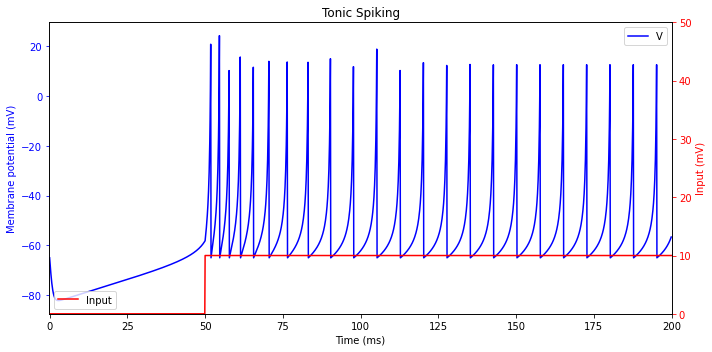

In [2]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.02, 0.40, -65.0, 2.0

current = bp.inputs.section_input(values=[0., 10.], durations=[50, 150])
neu.run(duration=200., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Tonic Spiking')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 200.1)
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 50)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Phasic Spiking

A neuron may fire only a single spike at the onset of the input, and remain quiescent afterwards. Such a response is called phasic spiking, and it is useful for detection of the beginning of stimulation.

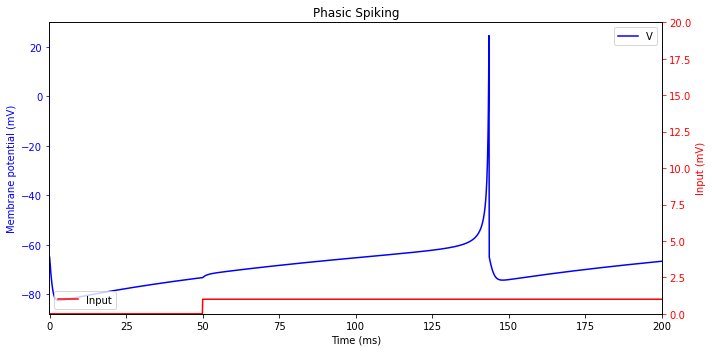

In [3]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.02, 0.25, -65.0, 6.0

current = bp.inputs.section_input(values=[0., 1.], durations=[50, 150])
neu.run(duration=200., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Phasic Spiking')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 200.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 20)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Tonic Bursting

Some neurons, such as the chattering neurons in cat neocortex, ﬁre periodic bursts of spikes when stimulated. The interburst frequency may be as high as 50 Hz, and it is believed that such neurons contribute to the gamma-frequency oscillations in the brain.

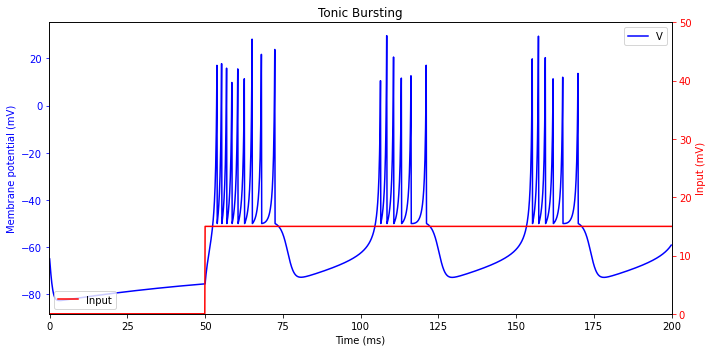

In [4]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.02, 0.20, -50.0, 2.0

current = bp.inputs.section_input(values=[0., 15.], durations=[50, 150])
neu.run(duration=200., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Tonic Bursting')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 200.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 50)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Phasic Bursting

Similarly to the phasic spikers, some neurons are phasic bursters. Such neurons report the beginning of the stimulation by transmitting a burst.

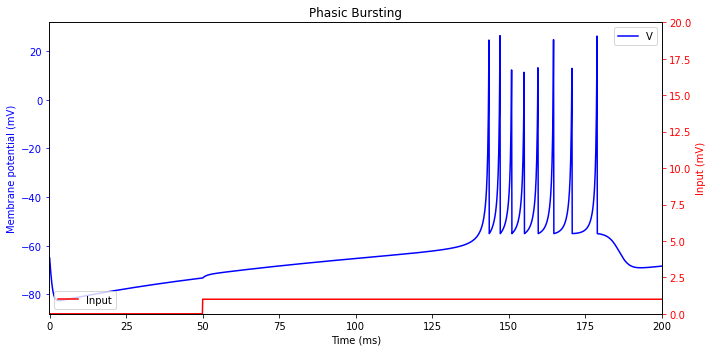

In [5]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.02, 0.25, -55.0, 0.05

current = bp.inputs.section_input(values=[0., 1.], durations=[50, 150])
neu.run(duration=200., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Phasic Bursting')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 200.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 20)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()

plt.show()

### Mixed Mode

Intrinsically bursting (IB) excitatory neurons in mammalian neocortex can exhibit a mixed type of spiking activity. They ﬁre a phasic burst at the onset of stimulation and then switch to the tonic spiking mode.

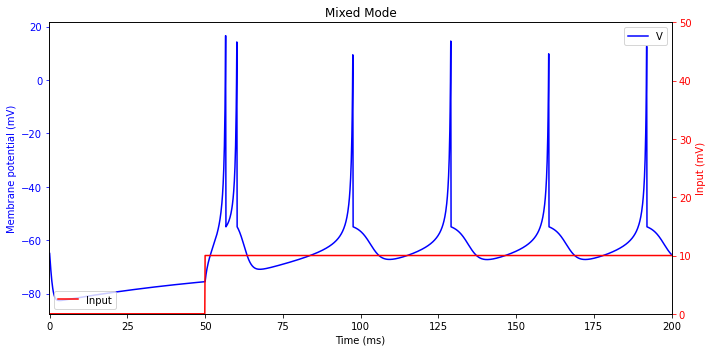

In [6]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.02, 0.20, -55.0, 4.0

current = bp.inputs.section_input(values=[0., 10.], durations=[50, 150])
neu.run(duration=200., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Mixed Mode')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 200.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 50)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Spike Frequency Adaptation

The most common type of excitatory neuron in mammalian neocortex, namely the regular spiking (RS) cell, ﬁres tonic spikes with decreasing frequency. That is, the frequency is relatively high at the onset of stimulation, and then it adapts. Low-threshold spiking (LTS) inhibitory neurons also have this property. 

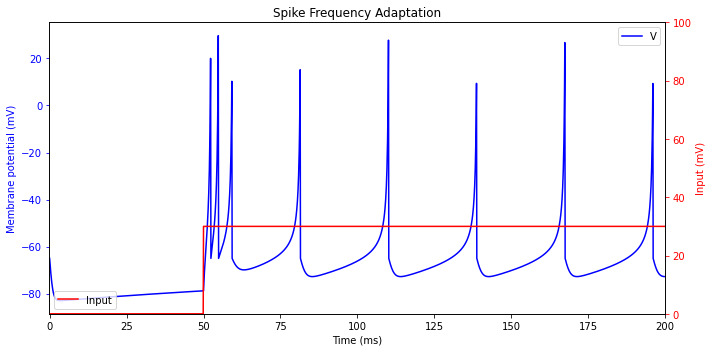

In [7]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.01, 0.20, -65.0, 8.0

current = bp.inputs.section_input(values=[0., 30.], durations=[50, 150])
neu.run(duration=200., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Spike Frequency Adaptation')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 200.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 100)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Class 1 Excitability

The frequency of tonic spiking of neocortical RS excitatory neurons depends on the strength of the input, and it may span the range from 2 Hz to 200 Hz, or even greater. The ability to ﬁre low-frequency spikes when the input is weak (but superthreshold) is called Class 1 excitability.

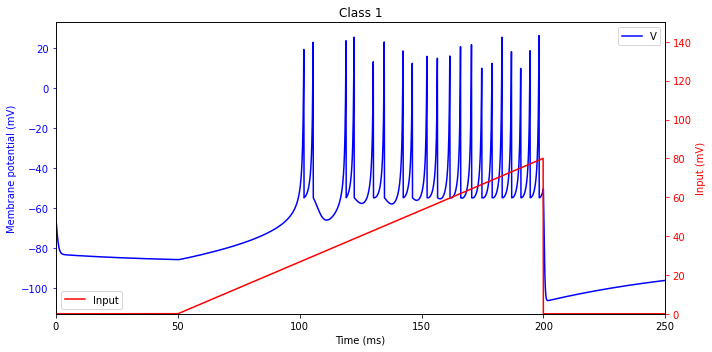

In [8]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.02, -0.1, -55.0, 6.0

current = bp.inputs.ramp_input(c_start=0., c_end=80., t_start=50., t_end=200., duration=250)
neu.run(duration=250., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Class 1')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 250.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 150)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Class 2 Excitability

Some neurons cannot ﬁre low-frequency spike trains. That is, they are either quiescent or ﬁre a train of spikes with a certain relatively large frequency, say 40 Hz. Such neurons are called Class 2 excitable.

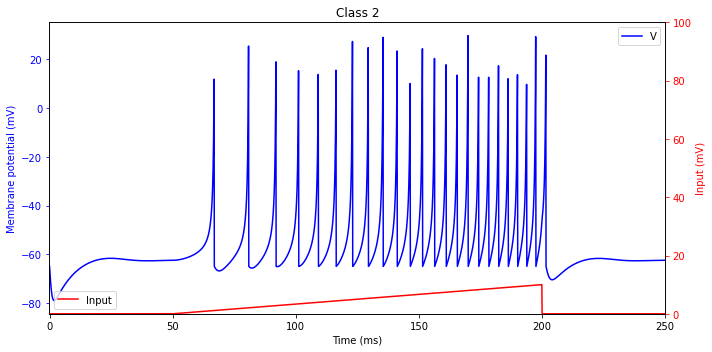

In [9]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.20, 0.26, -65.0, 0.0

current = bp.inputs.ramp_input(c_start=0., c_end=10., t_start=50., t_end=200., duration=250)
neu.run(duration=250., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Class 2')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 250.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 100)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Spike Latency

Most cortical neurons ﬁre spikes with a delay that depends on the strength of the input signal. For a relatively weak but superthreshold input, the delay, also called spike latency, can be quite large. 

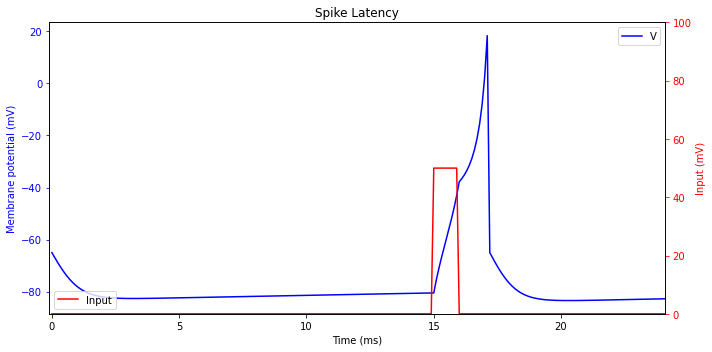

In [10]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.02, 0.20, -65.0, 6.0

current = bp.inputs.section_input(values=[0., 50., 0.], durations=[15, 1, 15])
neu.run(duration=31., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Spike Latency')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 24.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 100)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Subthreshold Oscillations

Practically every brain structure has neurons capable of exhibiting oscillatory potentials. The frequency of such oscillations play an important role and such neurons act as bandpass ﬁlters.

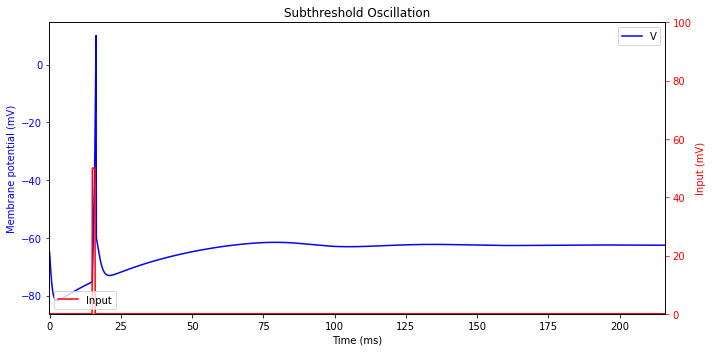

In [11]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.05, 0.26, -60.0, 0.0

current = bp.inputs.section_input(values=[0., 50., 0.], durations=[15, 1, 200])
neu.run(duration=216., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Subthreshold Oscillation')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.tick_params('y', colors='b')
ax1.set_xlim(-0.1, 216.1)
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 100)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Rebound Spike

When a neuron receives and then is released from an inhibitory input, it may ﬁre a post-inhibitory (rebound) spike. This phenomenon is related to the anodal break excitation in excitable membranes. Many spiking neurons can ﬁre in response to brief inhibitory inputs thereby blurring the difference between excitation and inhibition.

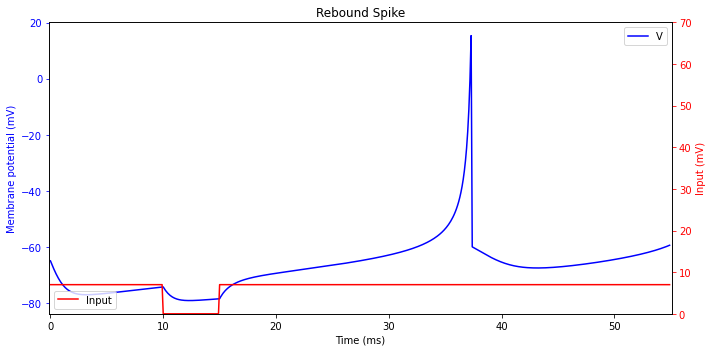

In [12]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.03, 0.25, -60.0, 4.0

current = bp.inputs.section_input(values=[7., 0., 7.], durations=[10, 5, 40])
neu.run(duration=55., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Rebound Spike')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 55.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 70)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Depolarizing After-potentials

After ﬁring a spike, the membrane potential of a neuron may exhibit a prolonged after-hyperpolarization (AHP)),or a prolonged depolarized after-potential (DAP). Such DAPs can appear because of dendritic inﬂuence, because of a high-threshold inward currents activated during the spike, or because of an interplay between subthreshold voltage-gated currents.

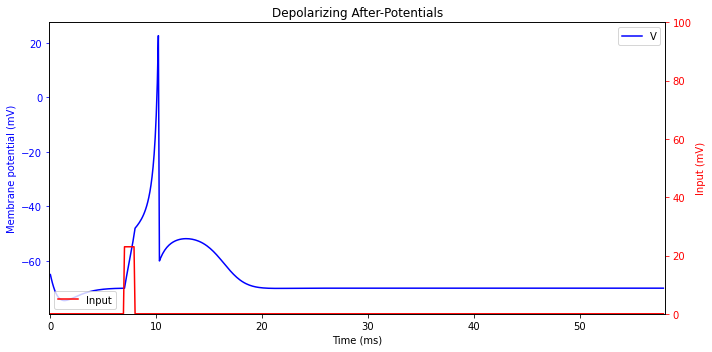

In [13]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 1.00, 0.20, -60.0, -21.0

current = bp.inputs.section_input(values=[0., 23, 0], durations=[7, 1, 50])
neu.run(duration=58., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Depolarizing After-Potentials')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 58.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 100)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Resonator

Due to the resonance phenomenon, neurons having oscillatory potentials can respond selectively to the inputs having frequency content similar to the frequency of subthreshold oscillations. Such neurons can implement frequency-modulated (FM) interactions and multiplexing of signal.

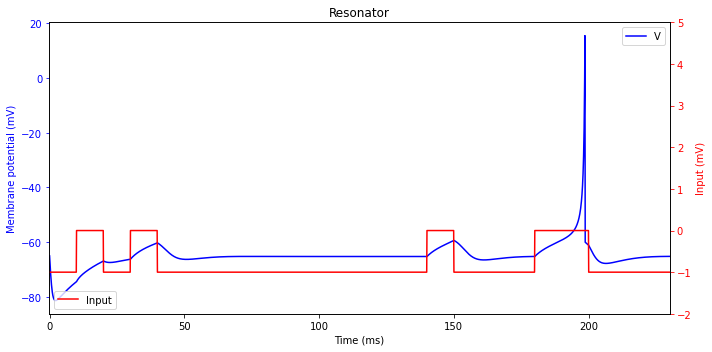

In [14]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.10, 0.26, -60.0, -1.0

current = bp.inputs.section_input(values=[-1, 0., -1, 0, -1, 0, -1, 0, -1],
                                  durations=[10, 10, 10, 10, 100, 10, 30, 20, 30])
neu.run(duration=230., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Resonator')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 230.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(-2, 5)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Integrator

Neurons without oscillatory potentials act as integrators. They prefer high-frequency input; the higher the frequency the more likely they ﬁre.

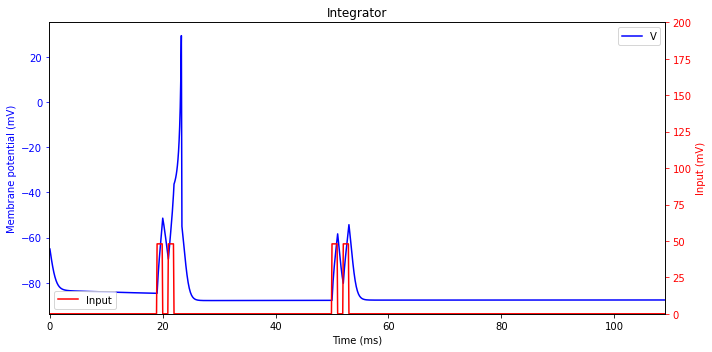

In [15]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.02, -0.1, -55.0, 6.0

current = bp.inputs.section_input(values=[0, 48, 0, 48, 0, 48, 0, 48, 0],
                                  durations=[19, 1, 1, 1, 28, 1, 1, 1, 56])
neu.run(duration=109., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Integrator')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 109.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 200)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Threshold Variability

Biological neurons have a variable threshold that depends on the prior activity of the neurons.

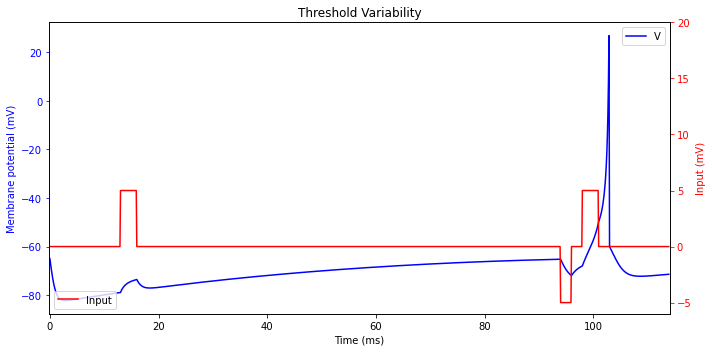

In [16]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.03, 0.25, -60.0, 4.0

current = bp.inputs.section_input(values=[0, 5, 0, -5, 0, 5, 0],
                                  durations=[13, 3, 78, 2, 2, 3, 13])
neu.run(duration=114., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Threshold Variability')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 114.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(-6, 20)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Bistability

Some neurons can exhibit two stable modes of operation: resting and tonic spiking (or even bursting). An excitatory or inhibitory pulse can switch between the modes, thereby creating an interesting possibility for bistability and short-term memory.

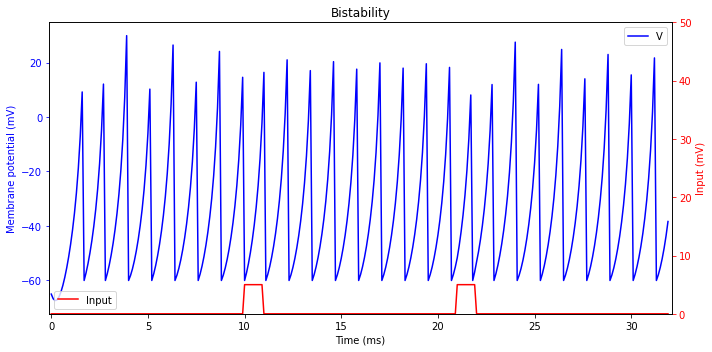

In [17]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 1.00, 1.50, -60.0, 0.0

current = bp.inputs.section_input(values=[0., 5., 0, 5, 0], durations=[10, 1, 10, 1, 10])
neu.run(duration=32., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Bistability')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 32.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 50)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

## 3. Different types of neurons

The table above gives the value of the parameter $a,b,c,d$ under 7 types of neurons.

| Neuron | a | b | c | d |
|------|------|------|------|------|
| Regular Spiking (RS) | 0.02 | 0.2 | -65 | 8 |
| Intrinsically Bursting (IB) | 0.02 | 0.2 | -55 | 4 |
| Chattering (CH) | 0.02 | 0.2 | -50 | 2 |
| Fast Spiking (FS) | 0.1 | 0.2 | -65 | 2 |
| Thalamo-cortical (TC) | 0.02 | 0.25 | -65 | 0.05 |
| Resonator (RZ) | 0.1 | 0.26 | -65 | 2 |
| Low-threshold Spiking (LTS) | 0.02 | 0.25 | -65 | 2 |

### Regular Spiking (RS)


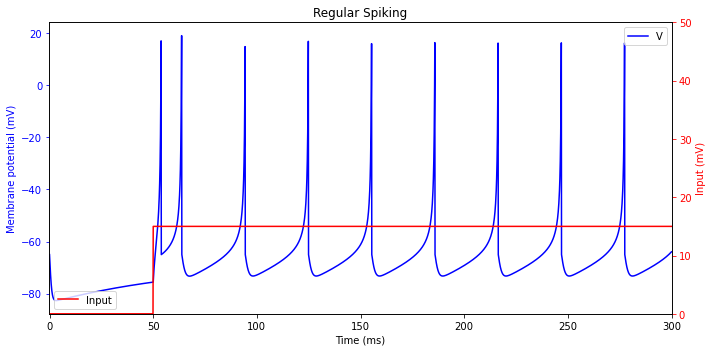

In [18]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.02, 0.2, -65, 8

current = bp.inputs.section_input(values=[0., 15.], durations=[50, 250])
neu.run(duration=300., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Regular Spiking')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 300.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 50)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Intrinsically Bursting (IB)

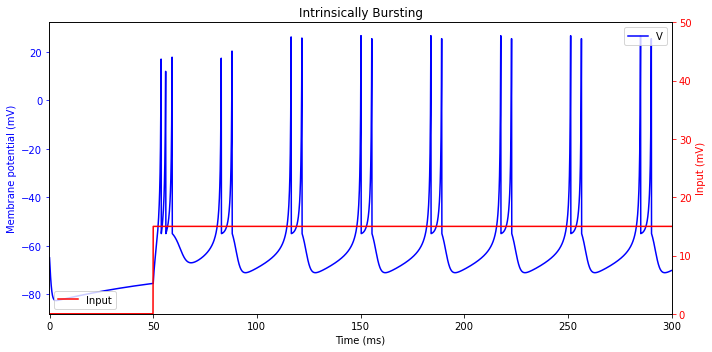

In [19]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.02, 0.2, -55, 4

current = bp.inputs.section_input(values=[0., 15.], durations=[50, 250])
neu.run(duration=300., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Intrinsically Bursting')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 300.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 50)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Chattering (CH)

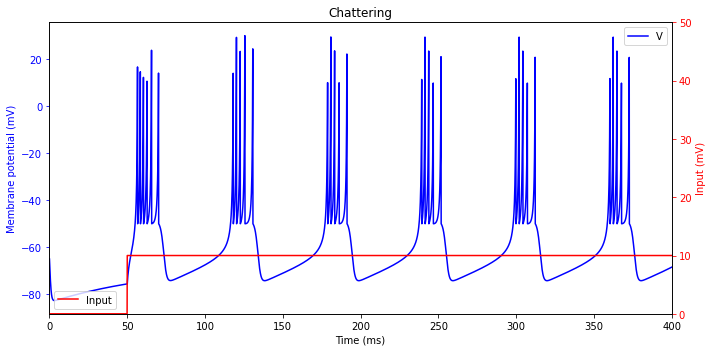

In [20]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.02, 0.2, -50, 2

current = bp.inputs.section_input(values=[0., 10.], durations=[50, 350])
neu.run(duration=400., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Chattering')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 400.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 50)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Fast Spiking (FS)

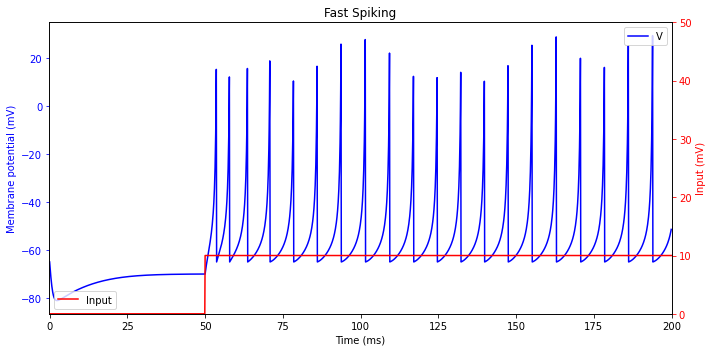

In [21]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.1, 0.2, -65, 2

current = bp.inputs.section_input(values=[0., 10.], durations=[50, 150])
neu.run(duration=200., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Fast Spiking')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 200.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 50)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Thalamo-cortical (TC)

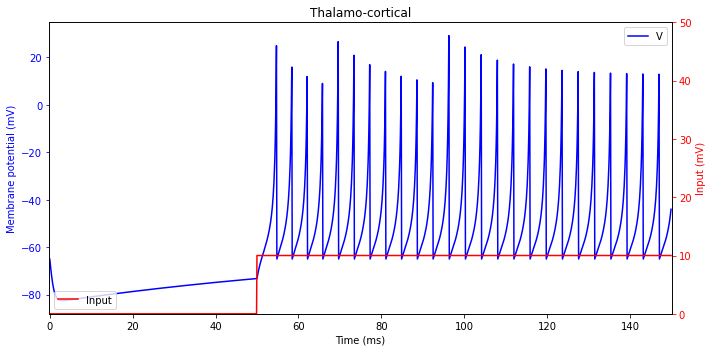

In [22]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.02, 0.25, -65, 0.05

current = bp.inputs.section_input(values=[0., 10.], durations=[50, 100])
neu.run(duration=150., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Thalamo-cortical')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 150.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 50)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Resonator (RZ)

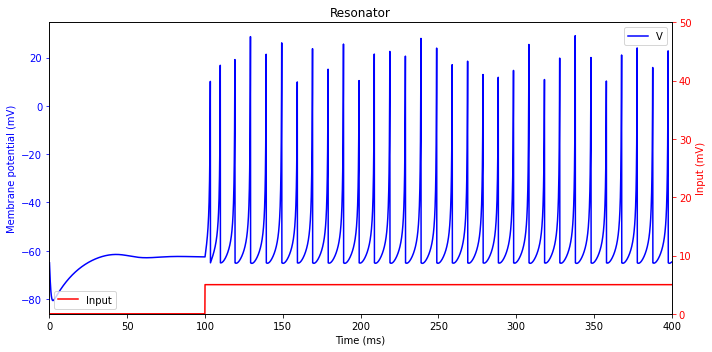

In [23]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.1, 0.26, -65, 2

current = bp.inputs.section_input(values=[0., 5.], durations=[100, 300])
neu.run(duration=400., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Resonator')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 400.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 50)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()
plt.show()

### Low-threshold Spiking (LTS)

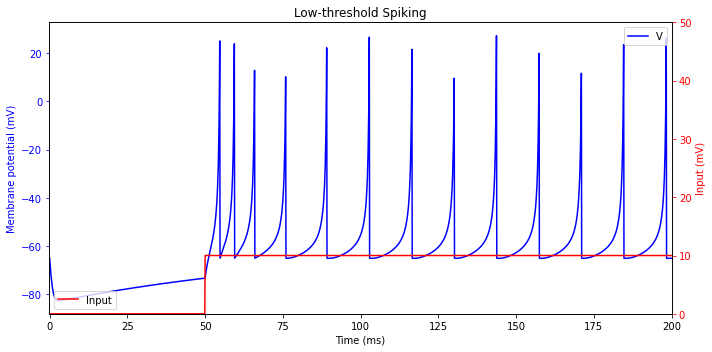

In [24]:
neu = brainmodels.neurons.Izhikevich(1, monitors=['V', 'u'])
neu.a, neu.b, neu.c, neu.d = 0.02, 0.25, -65, 2

current = bp.inputs.section_input(values=[0., 10.], durations=[50, 150])
neu.run(duration=200., inputs=['input', current, 'iter'])

fig, ax1 = plt.subplots(figsize=(10, 5))
plt.title('Low-threshold Spiking')
ax1.plot(neu.mon.ts, neu.mon.V[:, 0], 'b', label='V')
ax1.set_xlabel('Time (ms)')
ax1.set_ylabel('Membrane potential (mV)', color='b')
ax1.set_xlim(-0.1, 200.1)
ax1.tick_params('y', colors='b')
ax2 = ax1.twinx()
ax2.plot(neu.mon.ts, current, 'r', label='Input')
ax2.set_xlabel('Time (ms)')
ax2.set_ylabel('Input (mV)', color='r')
ax2.set_ylim(0, 50)
ax2.tick_params('y', colors='r')
ax1.legend(loc=1)
ax2.legend(loc=3)
fig.tight_layout()

plt.show()

## References

[1]. Izhikevich, E. M . Which model to use for cortical spiking neurons?[J]. IEEE Trans Neural Netw, 2004, 15(5):1063-1070.

[2]. Izhikevich E M . Simple model of spiking neurons[J]. IEEE Transactions on Neural Networks, 2003, 14(6):1569-72.